The goal of this week's workshop is to become familiar with the Pandas `DataFrame` data structure and begin looking at some simple data analysis and visualisation.   We'll look at two sample data sets and perform some analysis on them.

In [1]:
student_name = "Lance Te"
student_id = "45581819"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Auto MPG Data

Our first exercise is with some data on cars from the US containing information about car size and power and fuel consumption (miles per gallon or mpg).   We'll use this to explore the Pandas `DataFrame` options for selecting and plotting data and for computing statistics over columns. 

First we read the data using `pd.read_table` since the data ([auto-mpg.data](files/auto-mpg.data)) is in a 
space separated tabular format (take a look at the raw data to see what this means).   I've added an 
explicit list of column headings and some options to `read_table` to get the data in the right format.

In [3]:
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'modelyear', 'origin', 'name']
auto = pd.read_table('files/auto-mpg.data', delim_whitespace=True, header=None, names=columns)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


Now that you have the data in a DataFrame, write code in cells below to do the following:

* show the size of the data - how many rows and columns are there?
* select just the `mpg` column, find the mean value of MPG for all cars
* select all rows where the value of cylinders is 6, how many are there?
* what is the mean MPG for 6 cylinder cars?
* create a scatter plot of `mpg` vs `weight`
* create a similar plot but just for the 8 cylinder cars

You might want to refer to the [Pandas Tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) or 
 [10 Minutes to Pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html) for some hints.

In [4]:
print('Auto has %s rows, and %s columns' % (auto.shape[0], auto.shape[1]))
print('The average MPG for all cars is %.2fmpg' % auto['mpg'].mean())
print('There are %s rows where the value of cylinders is 6' % len(auto[auto['cylinders']==6]))
print('The average MPG for 6-cylinder cars is %.2fmpg' % auto['mpg'][auto['cylinders']==6].mean())

Auto has 392 rows, and 9 columns
The average MPG for all cars is 23.45mpg
There are 83 rows where the value of cylinders is 6
The average MPG for 6-cylinder cars is 19.97mpg


Text(0.5, 0, 'Weight (lb)')

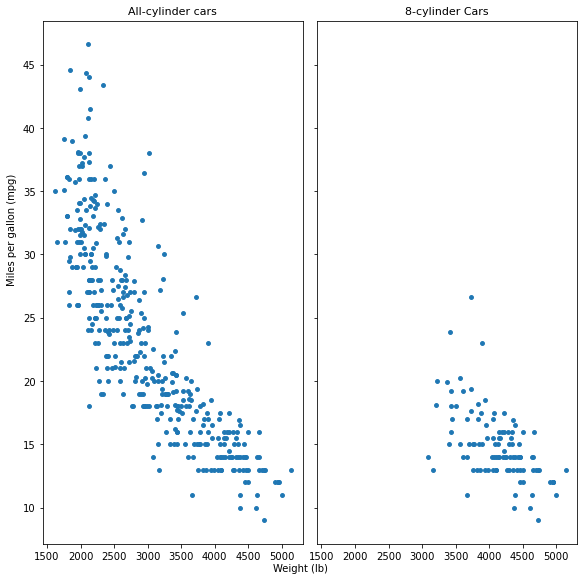

In [5]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, tight_layout=True, figsize=(8,8))
ax[0].set_title('All-cylinder cars', fontsize=11)
ax[0].scatter(auto['weight'], auto['mpg'], s=15)
ax[1].set_title('8-cylinder Cars', fontsize=11)
ax[1].scatter(auto['weight'][auto['cylinders']==8], auto['mpg'][auto['cylinders']==8], s=15)
fig.text(0, 0.5, 'Miles per gallon (mpg)', ha='center', rotation=90)
fig.text(0.5, 0, 'Weight (lb)', ha='center')

## Adult Data Analysis

Next we'll work with a dataset described in Chapter 3 of the text - the [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) dataset:

> "hosted on the UCI’s Machine Learning Repository.1 It contains approximately 32,000 observations concerning different financial parameters related to the US population: age, sex, marital (marital status of the individual), country, income (Boolean variable: whether the person makes more than $50,000 per annum), education (the highest level of education achieved by the individual), occupation, capital gain, etc.

The data is stored in a file 'files/adult.data' in this repository. It is in CSV format but the text uses a
different method to read it in to a dataframe - the reason is that it is a slightly non-standard format with spaces after the commas.  I've shown an alternate way to read the data below that uses read_csv with appropriate arguments to read the data.  This ensures that it doesn't try to read a header line (since there isn't one) and skips initial spaces in values.  We explicitly set the column names from a list of strings.

In [6]:
column_names = ['age', 'type_employer', 'fnlwgt', 'education', 'education_num', 
                'marital', 'occupation',' relationship', 'race', 'sex', 'capital_gain', 
                'capital_loss', 'hr_per_week', 'country', 'income']

adult = pd.read_csv('files/adult.data', header=None, names=column_names, skipinitialspace=True)
adult.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Follow the textbook examples to complete the tasks below.  Note that cutting and pasting from the text
is a bit problematic since they use special quote character in the code - if you try to copy-paste the code you'll get syntax errors. Instead, type out the commands, it might help you remember them better too.

The first task is to create separate dataframes for males and females, and for males and females earning over 50K (four dataframes in all).  When you have done this, **display the mean, median and standard deviation of age for each group** (Section 3.3.1).

One criticism I have of the code in the text is that they use very short variable names like df and ml2.  I've called the main dataframe `adult`; I suggest you use slightly longer varible names (`males`, `males_high`) to make your code easier to read - although avoid really long names (`males_with_high_income`) as they can make your code hard to read.

In [7]:
males = adult[adult['sex']=='Male']
males_high = adult[(adult['sex']=='Male') & (adult['income']=='>50K')]
females = adult[adult['sex']=='Female']
females_high = adult[(adult['sex']=='Female') & (adult['income']=='>50K')]

In [8]:
def ageStats(df):
    return [round(df['age'].mean(),2), round(df['age'].median(),2), round(df['age'].std(),2), min(df['age']), max(df['age'])]
d = {'': ['Mean', 'Median', 'Std Dev', 'Min', 'Max'],
     'males': ageStats(males), 'males_high': ageStats(males_high),
     'females': ageStats(females), 'females_high': ageStats(females_high)}
df = pd.DataFrame.from_dict(d)
df = df.set_index('')
df

,males,males_high,females,females_high
,,,,
Mean,39.43,44.63,36.86,42.13
Median,38.00,44.00,35.00,41.00
Std Dev,13.37,10.49,14.01,10.46
Min,17.00,19.00,17.00,19.00
Max,90.00,90.00,90.00,90.00


Plot the distributions of the ages of males and females in the dataset on a single graph (Section 3.3.2 figure 3.2).  Note that you can do without using the seaborn module as in the example, just use `color='indianred'` instead.  Work out ([from the pandas documentation](http://pandas.pydata.org/pandas-docs/)) how to add labels to the axes in your plot - the code in the chapter doesn't show this.

Compare your plot with the plot in the textbook.  Does it look the same? If it does, then you made the same error as they did. Compare the y-axis in Figures 3.1 and 3.2 (left) for Males; are there more males or females between ages 30 and 40? 

**This week's first checkpoint is to identify the bug in the textbook code.  Tell your tutor where you've found the bug.**

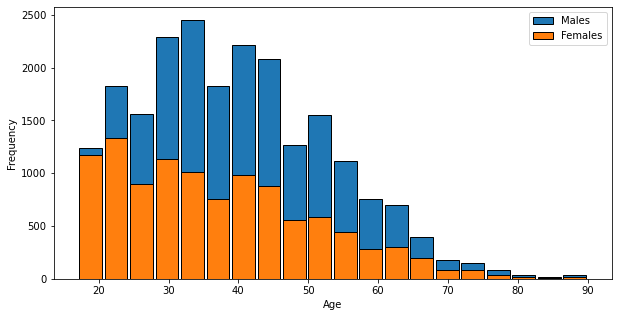

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(males['age'], edgecolor='black', rwidth=0.9, bins=20, label='Males')
ax.hist(females['age'], edgecolor='black', rwidth=0.9, bins=20, label='Females')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.legend(loc='upper right')
plt.show()

# Outliers

The text book Section 3.3.3 talks about removing outliers from the data, discarding values that lie a long way from the median or mean value.   For this dataset, they talk about removing any rows where the income is >50K but the age is below 22 or above 72 - basically saying that these values are unlikely to be real.   This is a reasonable thing to do but the code they give for it is buggy.  

They show this formula:

```
df2 = df.drop(df.index[
                      (df.income == ’>50K\n’) &
                      (df[’age’] > df[’age’].median() + 35) & (df[’age’] > df[’age’].median() -15)
])
```

Note that they are dropping from the dataframe `df` any rows where the income is high AND the age is greater than 72 (median + 35) AND the age is greater than 22 (median - 15).   So effectively the last term will have no effect.  
What they really mean is (age > 72) OR (age < 22).  Here are some expressions that express these constraints. I've printed the length of the dataframe after using the boolean expression to select the rows:

In [10]:
print(len(adult[(adult.income == '>50K')] ))
print(len(adult[(adult.age > 72)] ))
print(len(adult[(adult.age < 22)] ))
print(len(adult[(adult.income == '>50K')  & ((adult.age > 72) | (adult.age < 22))] ))

7841
401
3130
74


Based on these expressions, we can drop rows outside of the target range using the `drop` method as in the textbook.  Note the use of `adult.index`.  The argument to drop is a series giving the indexes of the rows we want to remove from the dataframe.   So we filter the index of the dataframe using the boolean expression to get this.

In [11]:
# remove outliers - people with high income who are too old or too young
adult_clean = adult.drop(adult.index[(adult.income == '>50K') & 
                                      ((adult['age'] > 72) | (adult['age'] < 22))])

# confirm that we have restricted the range of ages for high earners, should see 
adult_clean[adult_clean.income=='>50K'].age.describe()

count    7767.000000
mean       43.965495
std        10.044728
min        22.000000
25%        36.000000
50%        43.000000
75%        51.000000
max        72.000000
Name: age, dtype: float64

Note that unlike in the textbook, the minimum age is now 22 (not 19).

Given this filtered dataset, repeat the analysis in the remainder of section 3.3.3 to **determine whether the difference between males and females is changed once outliers are removed**. To do this you will need to compute versions of the male and female high earners age series with and without outliers removed.  You can do this directly from the `adult` and `adult_clean` dataframes.

In [12]:
males_clean = adult_clean[adult_clean['sex']=='Male']
males_high_clean = adult_clean[(adult_clean['sex']=='Male') & (adult_clean['income']=='>50K')]
females_clean = adult_clean[adult_clean['sex']=='Female']
females_high_clean = adult_clean[(adult_clean['sex']=='Female') & (adult_clean['income']=='>50K')]
d.update({'males_clean': ageStats(males_clean), 'males_clean_high': ageStats(males_high_clean),
          'females_clean': ageStats(females_clean), 'females_clean_high': ageStats(females_high_clean)})
df = pd.DataFrame.from_dict(d)
df = df.set_index('')
df = df[['males', 'males_clean', 'males_high', 'males_clean_high',
    'females', 'females_clean', 'females_clean_high']]
df

,males,males_clean,males_high,males_clean_high,females,females_clean,females_clean_high
,,,,,,,
Mean,39.43,39.33,44.63,44.33,36.86,36.83,41.93
Median,38.00,38.00,44.00,44.00,35.00,35.00,41.00
Std Dev,13.37,13.23,10.49,10.01,14.01,13.97,9.99
Min,17.00,17.00,19.00,22.00,17.00,17.00,22.00
Max,90.00,90.00,90.00,72.00,90.00,90.00,72.00


Generate figure 3.5 from the textbook that shows the relative frequency of male an female high earners as a function of age.  Again, label your axes and the plot overall.

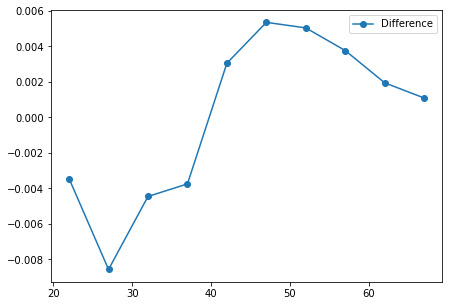

In [13]:
males_freq, males_age = np.histogram(males_high_clean['age'], density=1)
females_freq, females_age = np.histogram(females_high_clean['age'], density=1)

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(males_age[:-1], (males_freq - females_freq), 'o-', label='Difference')
ax.legend(loc='upper right')
plt.show()

Finally, use the **Pearson’s median skewness coefficient** from Section 3.3.4 to confirm the difference in the shape of the distribution of male and female age distributions.

The formula for this is given by:
$$g_p = 3(\mu - \tilde\mu)\sigma$$

In [14]:
def pearson(x):
    x = x['age']
    return 3 * (x.mean() - x.median()) * x.std()
print('The skewness coefficient for high income males is %.2f' % pearson(males_high_clean))
print('The skewness coefficient for high income females is %.2f' % pearson(females_high_clean))

The skewness coefficient for high income males is 9.77
The skewness coefficient for high income females is 27.94


Summarise the results of your analysis. Do you reach the same conclusion as the textbook? What if any differences do you observe with the correct removal of outliers?

## Analysis

* The difference in the sample means can be considered initial evidence that there are differences between men and women with high income!
* We can see that the mean number of hours worked per week by women is significantly lesser than that worked by men, but with much higher variance and standard deviation.
* The median age of high-income people is higher than the whole set of working people, although the difference between men and women in both sets is the same.
* From this histograms, we can see that there are many more men in these conditions than women.
* We can see that by removing the outliers, the difference between the populations (men and women) actually decreased. In our case, there were more outliers in men than women. If the difference in the mean values before removing the outliers is 2.5, after removing them it slightly decreased to 2.39.
* In the 'Differences in promoting men vs women' graph, we can see that the differences between male and female values are slightly negative before age 42 and positive after it. Hence, women tend to be promoted (receive more than 50K) earlier than men.

**This week's final checkpoint is to complete this notebook and also writing your analysis. Writing a brief commentary regarding numbers and plots is very important to highlight what you can conclude from your data exploration.**

**If you need help in finishing this week's notebook, kindly take help from your tutor. Also, refer to Chapter 3 of your textbook**

## Challenge

If you complete this work in plenty of time, explore the dataset a little more to 
familiarise yourself with some other features of Pandas dataframes. Example questions might be:

- does education level have an effect on income? Use [groupby](http://pandas.pydata.org/pandas-docs/stable/groupby.html) to look at the different values of the education variable and the number
of records in each group.  Select one or two groups and compare the low and high income bands for these. 
- The `education_num` column is (I think) a numerical measure of the level of education of the person - higher for a higher level of qualification.  Look at the difference in this variable for groups defined by the `marital` variable: are married people more or less highly educated than those who are single?


### Education vs Income

Here I look at the number of individuals (split by gender) in each level of education.

In [21]:
# Values for education_num
key = {}
for i in range(1, 17):
    key[i] = adult[adult.education_num==i].iloc[0]['education']

# Males
low_males = males_clean[males_clean['income']=='<=50K'].groupby('education_num').count()
high_males = males_clean[males_clean['income']=='>50K'].groupby('education_num').count()
df_males = low_males[['income']].join(high_males[['income']], lsuffix='_low', rsuffix='_high')
df_males['education'] = key.values()
cols = ['education', 'income_low', 'income_high']

# Females
low_females = females_clean[females_clean['income']=='<=50K'].groupby('education_num').count()
high_females = females_clean[females_clean['income']=='>50K'].groupby('education_num').count()
df_females = low_females[['income']].join(high_females[['income']], lsuffix='_low', rsuffix='_high')

# Merging the two and standardising by gender
income = pd.merge(df_males[cols], df_females, on='education_num', suffixes=('_male', '_female'))
income[income.columns[1:3]] = round(income[income.columns[1:3]] / len(males_clean)*100, 2)
income[income.columns[3:5]] = round(income[income.columns[3:5]] / len(females_clean)*100, 2)

income

,education,income_low_male,income_high_male,income_low_female,income_high_female
education_num,,,,,
1,Preschool,0.16,NaN,0.15,NaN
2,1st-4th,0.53,0.03,0.43,NaN
3,5th-6th,1.08,0.06,0.76,0.02
4,7th-8th,2.06,0.16,1.48,0.01
5,9th,1.60,0.10,1.29,0.05
6,10th,2.66,0.27,2.71,0.03
7,11th,3.18,0.24,3.94,0.07
8,12th,1.20,0.13,1.30,0.03
9,HS-grad,26.06,6.61,29.41,2.08


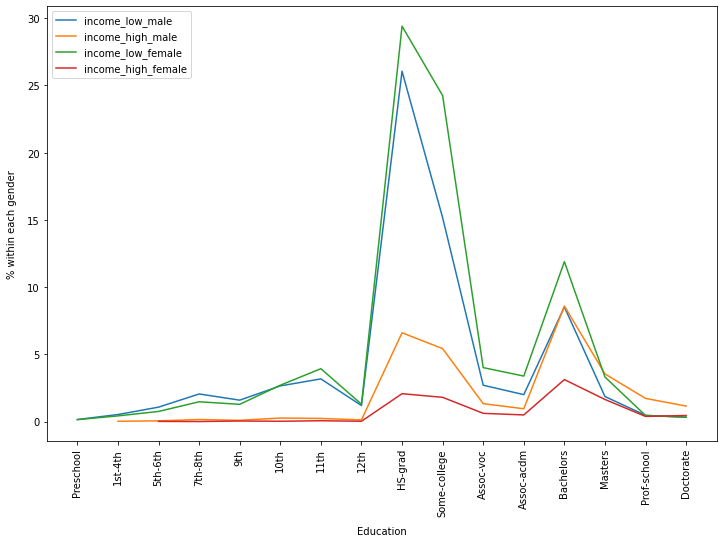

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
for col in income.columns[1:]:
    ax.plot(income['education'], income[col], label=col)
plt.xlabel('Education', labelpad=10)
plt.ylabel('% within each gender', labelpad=10)
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.show()

There are a few conclusions that can be drawn:

* The distribution of all groups shares similar visual features including the peaks at `HS-grad` and `Bachelors`.
* In order to access high incomes (>50k), an individual must at least graduate high school.
* Amongst high income males and females, the most common level of education is a `Bachelors` degree.
* There is only a small % of females that pursue education beyond `HS-grad`.
* The % of low income males, and the % of low income females going on to complete higher level education is < 5%.
* There exists a relatively large percentage of males and females (>10%) that obtain a `Bachelors` degree but remain low income.

The last observation is quite disconcerting, but none are unsurprising.

### Race vs Income

In [23]:
race=[]
for r in adult_clean['race']:
    if r not in race:
        race.append(r)
race

['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']

In [24]:
race = ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']

In [28]:
# Males
low_males = males_clean[males_clean['income']=='<=50K'].groupby('race').count()
high_males = males_clean[males_clean['income']=='>50K'].groupby('race').count()
df_males = low_males[['income']].join(high_males[['income']], lsuffix='_low', rsuffix='_high')

# Females
low_females = females_clean[females_clean['income']=='<=50K'].groupby('race').count()
high_females = females_clean[females_clean['income']=='>50K'].groupby('race').count()
df_females = low_females[['income']].join(high_females[['income']], lsuffix='_low', rsuffix='_high')

# Merging the two and standardising by gender
income = pd.merge(df_males, df_females, on='race', suffixes=('_male', '_female'))
income[income.columns[0:2]] = round(income[income.columns[0:2]] / len(males_clean)*100, 2)
income[income.columns[2:4]] = round(income[income.columns[2:4]] / len(females_clean)*100, 2)

income

,income_low_male,income_high_male,income_low_female,income_high_female
race,,,,
Amer-Indian-Eskimo,0.77,0.11,0.99,0.10
Asian-Pac-Islander,2.12,1.07,2.82,0.40
Black,5.85,1.36,13.62,0.83
Other,0.66,0.09,0.96,0.06
White,60.22,27.75,70.76,9.47


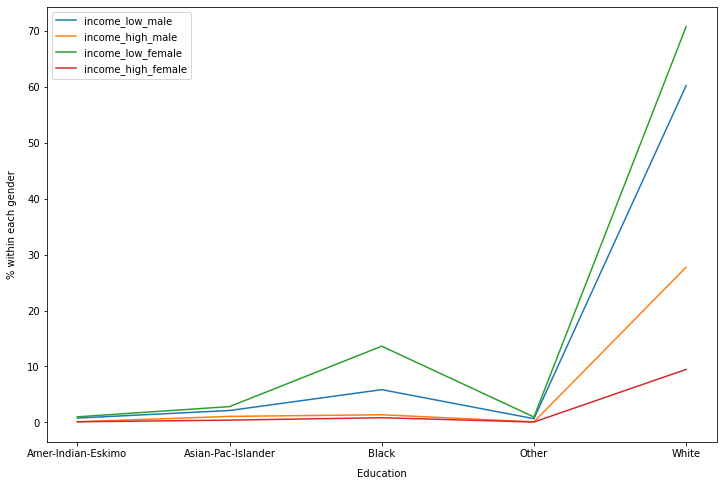

In [32]:
fig, ax = plt.subplots(figsize=(12,8))
for col in income.columns:
    ax.plot(income[col], label=col)
plt.xlabel('Education', labelpad=10)
plt.ylabel('% within each gender', labelpad=10)
plt.legend(loc='upper left')
plt.show()

The main observation that can be draw is that: within the male and female genders, the overwhelming majority of both high and low income earners are `White`.